# Radial Basis Function
* A quick demonstration of how the RBF kernel works with data that is not
linearly separable.
* **Note:** A large value of $\gamma$ might conduce to overfitting

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Translates slice objects to concatenation along the second axis.
X = np.c_[# Negative class
	(.3, -.8),
	(-1.5, -1),
    (-1.3, -.8),
    (-1.1, -1.3),
    (-1.2, -.3),
    (-1.3, -.5),
    (-.6, 1.1),
    (-1.4, 2.2),
    (1, 1),
    # positive class
    (1.3, .8),
    (1.2, .5),
    (.2, -2),
    (.5, -2.4),
    (.2, -2.3),
    (0, -2.7),
    (1.3, 2.1)].T

X

array([[ 0.3, -0.8],
       [-1.5, -1. ],
       [-1.3, -0.8],
       [-1.1, -1.3],
       [-1.2, -0.3],
       [-1.3, -0.5],
       [-0.6,  1.1],
       [-1.4,  2.2],
       [ 1. ,  1. ],
       [ 1.3,  0.8],
       [ 1.2,  0.5],
       [ 0.2, -2. ],
       [ 0.5, -2.4],
       [ 0.2, -2.3],
       [ 0. , -2.7],
       [ 1.3,  2.1]])

In [4]:
# Eight data points are from one class, and eight are from another.
Y = [-1] * 8 + [1] * 8
Y

[-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1]

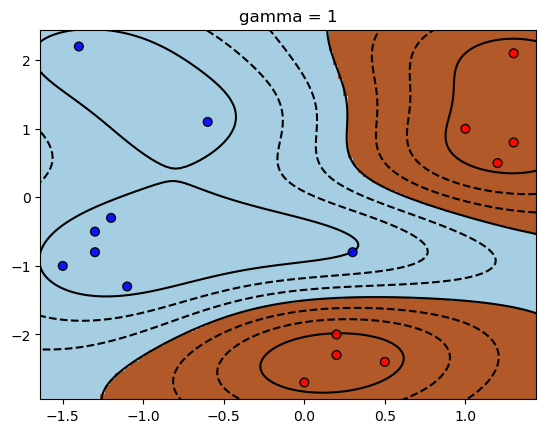

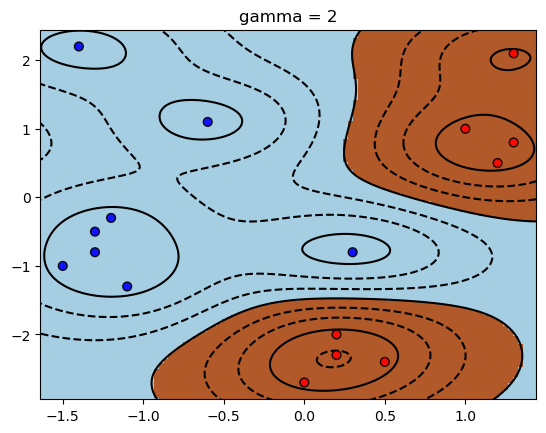

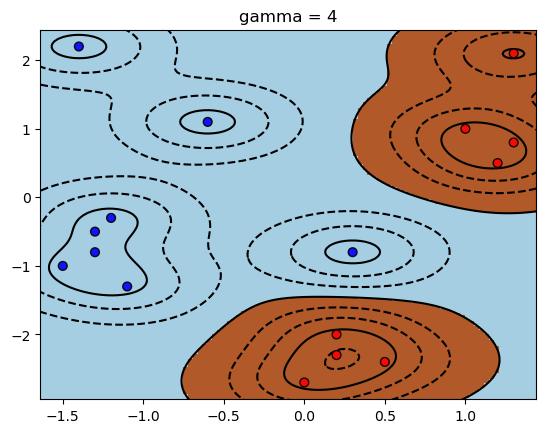

In [9]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Taking different values for the kernel coefficients
gamma_option = [1, 2, 4]

# Fitting individual SVM classifiers for each kernel coefficient
for i, gamma in enumerate(gamma_option, 1):
    # Create an SVM classifier with an RBF kernel and the current gamma value
    svm = SVC(kernel = 'rbf', gamma = gamma)

    # Fit the SVM classifier on the dataset (X, Y)
    svm.fit(X, Y)

    # Plot the dataset points with blue (first 8 points) and red (last 8 points) colors
    # The 'cmap' parameter is not needed here, as you are specifying colors directly
    plt.scatter(X[:, 0], X[:, 1], c=['b']*8+['r']*8, zorder=10, s=40,
                edgecolors='k', alpha = 0.9)

    plt.axis('tight')

    # Create a mesh-grid of points to visualize the decision boundary
    XX, YY = np.mgrid[-3:3:200j, -3:3:200j]

    # Get the decision function values for each point in the mesh-grid
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Reshape the decision function values to match the mesh-grid dimensions
    Z = Z.reshape(XX.shape)

    # Plot the decision boundary using pcolormesh
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)

    # Plot the contour lines of the decision function
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'])

    # Set the title of the plot to show the current gamma value
    plt.title('gamma = %d' % gamma)

    # Display the plot
    plt.show()
